In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

# Load the datasets
training_data = pd.read_csv('twitter_training.csv')
validation_data = pd.read_csv('twitter_validation.csv')

# Print the shape of the datasets
print("Training Data Shape:", training_data.shape)
print("Validation Data Shape:", validation_data.shape)

Training Data Shape: (74681, 4)
Validation Data Shape: (999, 4)


In [13]:
print(training_data.head())  # Prints the first 5 rows by default
print(validation_data.head())

print(training_data.tail())  # Prints the last 5 rows by default
print(validation_data.tail())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0

In [15]:
for index, row in training_data.iterrows():
    print(row)
    if index == 100:  # Stops after printing 100 rows
        break

2401                                                                                                  2401
Borderlands                                                                                    Borderlands
Positive                                                                                          Positive
im getting on borderlands and i will murder you all ,    I am coming to the borders and I will kill you...
Name: 0, dtype: object
2401                                                                                                  2401
Borderlands                                                                                    Borderlands
Positive                                                                                          Positive
im getting on borderlands and i will murder you all ,    im getting on borderlands and i will kill you ...
Name: 1, dtype: object
2401                                                                                              

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [19]:
# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    text = re.sub(r'^[a-z]\s+', ' ', text)
    text is re.sub(r'\s+', ' ', text)
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in set(stopwords.words('english'))]
    return ' '.join(tokens)

In [21]:
# Load and copy data frames
train_df = pd.read_csv('twitter_training.csv', names=['id', 'topic', 'sentiment', 'text'], header=None).copy()
valid_df = pd.read_csv('twitter_validation.csv', names=['id', 'topic', 'sentiment', 'text'], header=None).copy()

# Combine for preprocessing
df = pd.concat([train_df, valid_df], ignore_index=True)

# Processing steps
df['text'] = df['text'].apply(preprocess_text)

# Split again and ensure these are separate to avoid SettingWithCopyWarning
train_df = df.iloc[:len(train_df)].copy()
valid_df = df.iloc[len(train_df):].copy()

# Map sentiments to numeric values using direct column assignment
sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 0.5}
train_df['sentiment'] = train_df['sentiment'].map(sentiment_mapping)
valid_df['sentiment'] = valid_df['sentiment'].map(sentiment_mapping)

# Feature extraction
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
X_train = vectorizer.fit_transform(train_df['text']).toarray()
X_valid = vectorizer.transform(valid_df['text']).toarray()
y_train = train_df['sentiment'].values
y_valid = valid_df['sentiment'].values

In [22]:
# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

Epoch 1/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2985 - loss: nan - val_accuracy: 0.2660 - val_loss: nan
Epoch 2/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2974 - loss: nan - val_accuracy: 0.2660 - val_loss: nan
Epoch 3/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3008 - loss: nan - val_accuracy: 0.2660 - val_loss: nan
Epoch 4/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3022 - loss: nan - val_accuracy: 0.2660 - val_loss: nan
Epoch 5/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3018 - loss: nan - val_accuracy: 0.2660 - val_loss: nan
Epoch 6/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3021 - loss: nan - val_accuracy: 0.2660 - val_loss: nan
Epoch 7/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3022 - loss: nan - val_accuracy: 0.2660 - val_loss: nan
Epoch 8/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3052 - loss: nan - val_accuracy: 0.2660 - val_loss: nan
Epoch 9/10
584/584 ━━━━━

/var/folders/st/t_khv0jn3xs15hfzp00gzy1h0000gn/T/ipykernel_12751/2948310894.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="plasma")


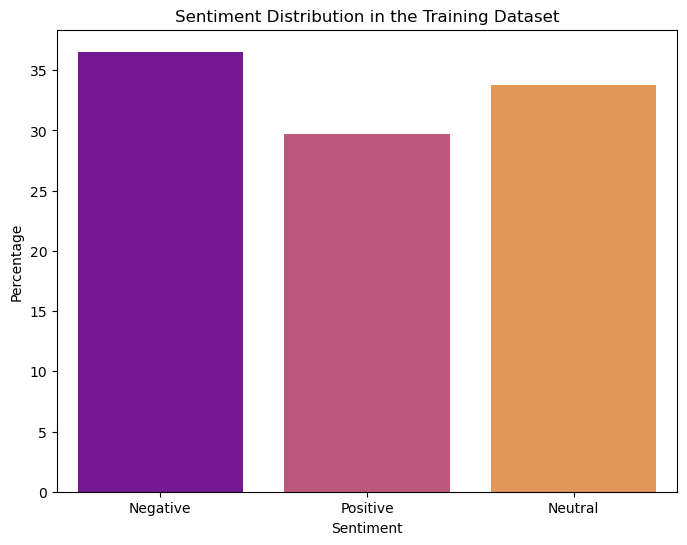

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'sentiment' is already mapped to numeric values in your dataframe
# Training DataFrame is named 'train_df'
sentiment_counts = train_df['sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="plasma")
plt.title('Sentiment Distribution in the Training Dataset')
plt.ylabel('Percentage')
plt.xlabel('Sentiment')
plt.xticks(ticks=range(len(sentiment_counts)), labels=['Negative', 'Positive', 'Neutral'])
plt.show()

In [27]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


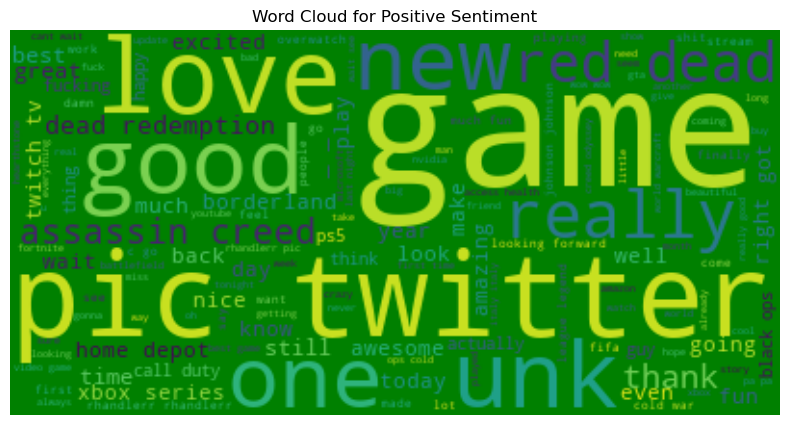

In [29]:
from wordcloud import WordCloud

# Generate a word cloud image for positive sentiment
positive_text = " ".join(review for review in train_df[train_df.sentiment == 1].text)
wordcloud_pos = WordCloud(background_color="green").generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Sentiment')
plt.show()

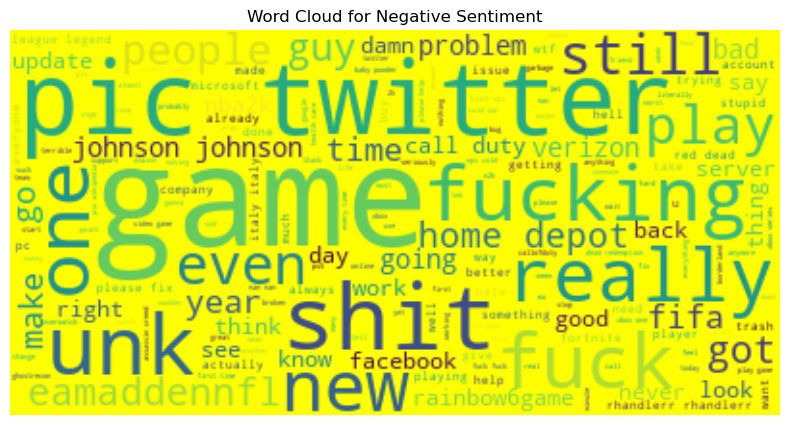

In [35]:
from wordcloud import WordCloud

# Generate a word cloud image for negative sentiment
negative_text = " ".join(review for review in train_df[train_df.sentiment == 0].text)
wordcloud_pos = WordCloud(background_color="yellow").generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Sentiment')
plt.show()

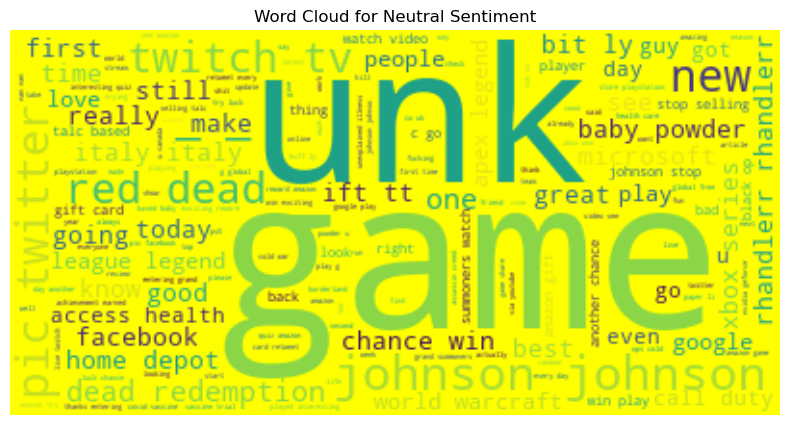

In [39]:
from wordcloud import WordCloud

# Generate a word cloud image for neutral sentiment
neutral_text = " ".join(review for review in train_df[train_df.sentiment == 0.5].text)
wordcloud_pos = WordCloud(background_color="yellow").generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Neutral Sentiment')
plt.show()

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4583 - loss: 0.7046      
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.6608
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4583 - loss: 0.6680    
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7083 - loss: 0.6323
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7083 - loss: 0.6231
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.6330
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.6194
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.6062
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.5690
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.5257
Number of labels in y_valid_clean: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


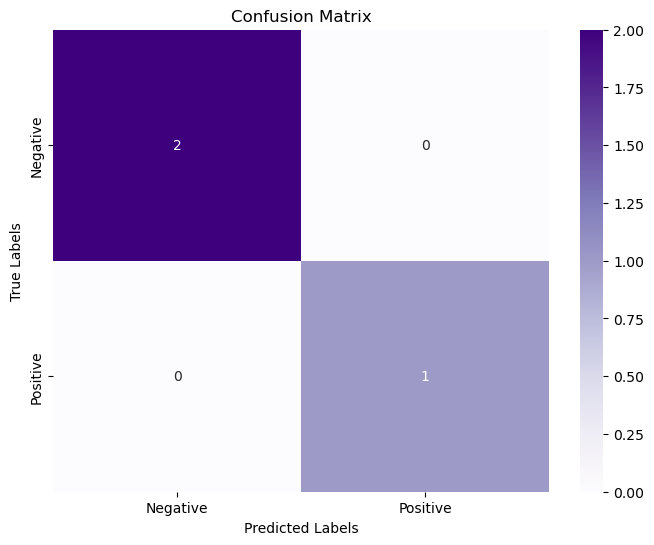

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Example data and labels (ensure these are correctly loaded and preprocessed)
X_train = np.array(["This is the first document.", "This document is the second document.", "And this is the third one."])
y_train = np.array([0, 1, 0])
X_valid = X_train  # Example validation data
y_valid = y_train  # Example validation labels

# Prepare vectorizer without limiting features
vectorizer = TfidfVectorizer(max_features=None)
vectorizer.fit(X_train)
X_train_clean = vectorizer.transform(X_train).toarray()
X_valid_clean = vectorizer.transform(X_valid).toarray()

# Model definition and training
model = Sequential([
    Input(shape=(X_train_clean.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_clean, y_train, epochs=10, batch_size=1)

# Preparing y_valid_clean and verifying its length
y_valid_clean = y_valid.copy()  # This should be prepared the same way y_train was
print("Number of labels in y_valid_clean:", len(y_valid_clean))

# Predictions and confusion matrix
test_predictions = model.predict(X_valid_clean)
test_predictions_binary = (test_predictions > 0.5).astype(int).flatten()
cm = confusion_matrix(y_valid_clean, test_predictions_binary)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

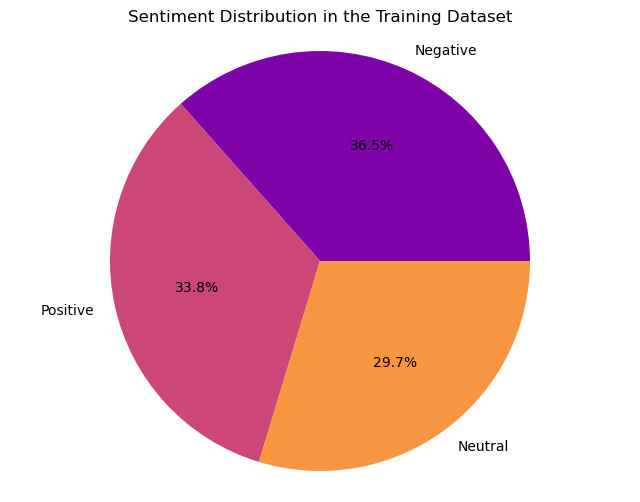

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'sentiment' is already mapped to numeric values in your dataframe
# Training DataFrame is named 'train_df'
sentiment_counts = train_df['sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=['Negative', 'Positive', 'Neutral'], autopct='%1.1f%%', colors=sns.color_palette("plasma", len(sentiment_counts)))
plt.title('Sentiment Distribution in the Training Dataset')
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

In [59]:
print(df.columns)

Index(['id', 'topic', 'sentiment', 'text'], dtype='object')


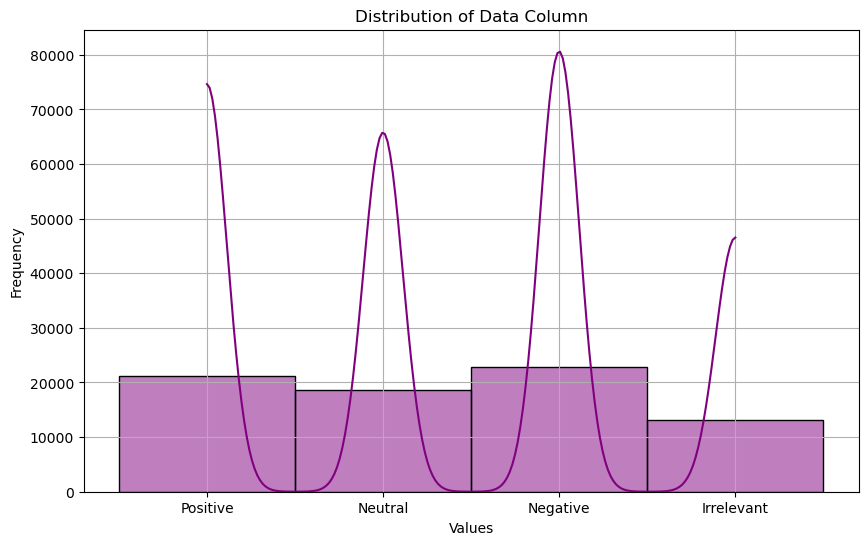

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Histogram for 'sentiment'
data = df['sentiment']

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='purple')  # KDE (Kernel Density Estimate) adds a density line
plt.title('Distribution of Data Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

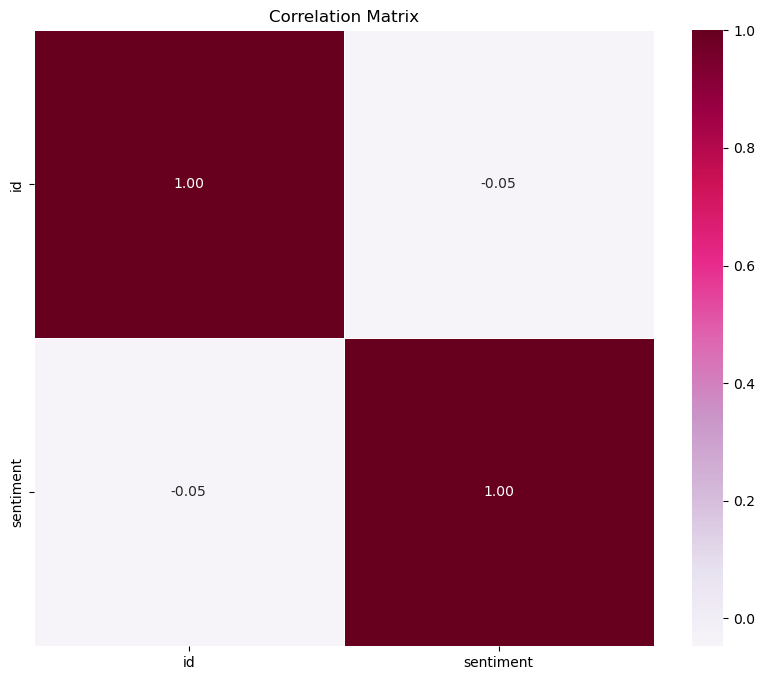

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = train_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [67]:
print(df.shape)

(75682, 4)


In [69]:
print(df)

         id                topic   sentiment  \
0      2401          Borderlands    Positive   
1      2401          Borderlands    Positive   
2      2401          Borderlands    Positive   
3      2401          Borderlands    Positive   
4      2401          Borderlands    Positive   
...     ...                  ...         ...   
75677  4891  GrandTheftAuto(GTA)  Irrelevant   
75678  4359                CS-GO  Irrelevant   
75679  2652          Borderlands    Positive   
75680  8069            Microsoft    Positive   
75681  6960      johnson&johnson     Neutral   

                                                    text  
0                           im getting borderland murder  
1                                     coming border kill  
2                             im getting borderland kill  
3                            im coming borderland murder  
4                         im getting borderland 2 murder  
...                                                  ...  
75677  tor

In [71]:
df.dtypes

id            int64
topic        object
sentiment    object
text         object
dtype: object

In [73]:
df.describe()

,id
count,75682.000000
mean,6432.579583
std,3740.243463
min,1.000000
25%,3196.000000
50%,6423.000000
75%,9602.000000
max,13200.000000


In [75]:
def predict_sentiment(text):
    text = preprocess_text(text)
    vectorized_text = vectorizer.transform([text]).toarray()
    prediction = model.predict(vectorized_text)
    return 'Positive' if prediction > 0.5 else 'Negative'

input_stmt = input("Enter the tweet :")
print(predict_sentiment(input_stmt))

Enter the tweet : I don't like twitter


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Negative
